In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Fetch the train and test data
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/test.csv")

# **Analyzing / Go-Through dataset**

In [3]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,217
Cabin,199
Destination,182
Age,179
VIP,203
RoomService,181
FoodCourt,183
ShoppingMall,208


# **Exploratory Data Analysis (EDA)**

### **1. Handle data-types of features**

In [7]:
train['CryoSleep'] = train['CryoSleep'].astype(bool)
test['CryoSleep'] = test['CryoSleep'].astype(bool)

train['VIP'] = train['VIP'].astype(bool)
test['VIP'] = test['VIP'].astype(bool)

 ### **2. Handling missing values**



In [8]:
# Handle the 'Age' missing values using its median
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Handle expenses(numerical) missing values
train['RoomService']   = train['RoomService'].fillna(0)
test['RoomService']    = test['RoomService'].fillna(0)
train['FoodCourt']     = train['FoodCourt'].fillna(0)
test['FoodCourt']      = test['FoodCourt'].fillna(0)
train['ShoppingMall']  = train['ShoppingMall'].fillna(0)
test['ShoppingMall']   = test['ShoppingMall'].fillna(0)
train['Spa']           = train['Spa'].fillna(0)
test['Spa']            = test['Spa'].fillna(0)
train['VRDeck']        = train['VRDeck'].fillna(0)
test['VRDeck']         = test['VRDeck'].fillna(0)


# Handle missing values of 'name' & 'cabin'
train['Name']  = train['Name'].fillna("Unknown")
test['Name']   = test['Name'].fillna("Unknown")
train['Cabin'] = train['Cabin'].fillna("Unknown")
test['Cabin']  = test['Cabin'].fillna("Unknown")

# Handle categorical missing values
train['HomePlanet']  = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
test['HomePlanet']   = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
train['CryoSleep']   = train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
test['CryoSleep']    = test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])
test['Destination']  = test['Destination'].fillna(test['Destination'].mode()[0])
train['VIP']         = train['VIP'].fillna(train['VIP'].mode()[0])
test['VIP']          = test['VIP'].fillna(test['VIP'].mode()[0])

# **Feature Engineering**

### **Splitting the 'Cabin' feature into Deck/Num/Side**

In [9]:
# Split Cabin to Deck / Num / Side
train[['Deck', 'CabinNum', 'Side']] = train['Cabin'].str.split('/', expand=True)
test[['Deck', 'CabinNum', 'Side']] = test['Cabin'].str.split('/', expand=True)

# Convert CabinNum to numeric
train['CabinNum'] = pd.to_numeric(train['CabinNum'], errors='coerce')
test['CabinNum'] = pd.to_numeric(test['CabinNum'], errors='coerce')

# Fill missing Deck/Side with "Unknown"
train['Deck'] = train['Deck'].fillna("Unknown")
test['Deck'] = test['Deck'].fillna("Unknown")

train['Side'] = train['Side'].fillna("Unknown")
test['Side'] = test['Side'].fillna("Unknown")

### **Grouping passenger based on their passengerId**

In [10]:
# Extract GroupId(family/group) and PersonNum
train['GroupId'] = train['PassengerId'].str.split('_').str[0]
train['PersonNum'] = train['PassengerId'].str.split('_').str[1].astype(int)

test['GroupId'] = test['PassengerId'].str.split('_').str[0]
test['PersonNum'] = test['PassengerId'].str.split('_').str[1].astype(int)

# Group size
group_size = train['GroupId'].value_counts()

train['GroupSize'] = train['GroupId'].map(group_size)
test['GroupSize'] = test['GroupId'].map(train['GroupId'].value_counts())

### **Create a new feature which represent all expenses**

In [11]:
# Total spending
train['TotalSpend'] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)
test['TotalSpend'] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

### **Drop unnecessary features**

In [12]:
# For training set
train.drop(['PassengerId', 'Name', 'Cabin', 'GroupId'], axis = 1, inplace=True)

# For test set
test_passenger_ids = test['PassengerId']
test.drop(['PassengerId', 'Name', 'Cabin', 'GroupId'], axis=1, inplace=True)

## **Convert boolean to integer**

In [13]:
# Convert boolean columns to integers (0/1)
bool_cols = ['CryoSleep', 'VIP', 'Transported']
train[bool_cols] = train[bool_cols].astype(int)
test[['CryoSleep', 'VIP']] = test[['CryoSleep', 'VIP']].astype(int)


# **Visulaization**

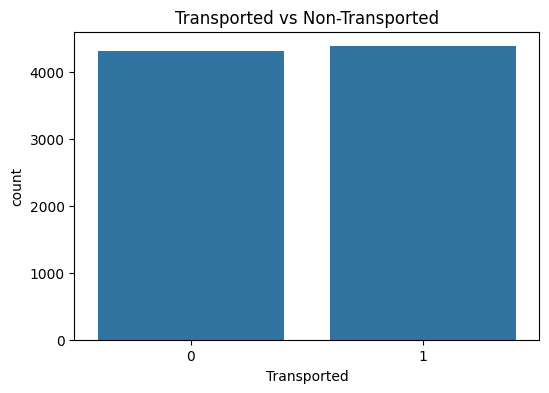

In [14]:
# Check the balance of target variable 'Transported'
plt.figure(figsize=(6,4))
sns.countplot(data = train, x = 'Transported')
plt.title("Transported vs Non-Transported")
plt.show()

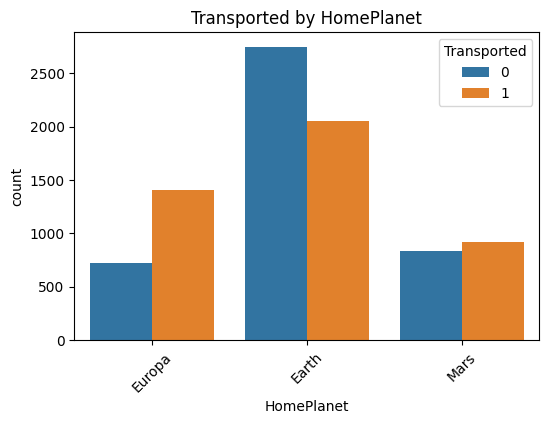

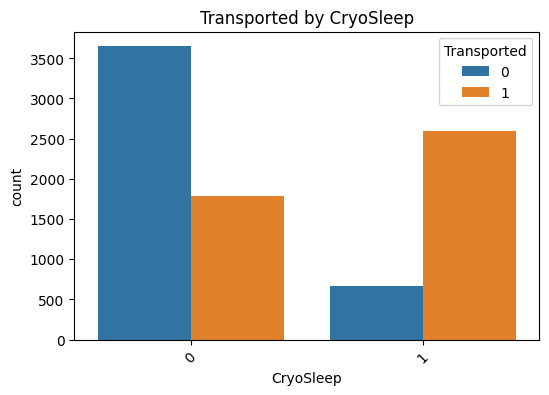

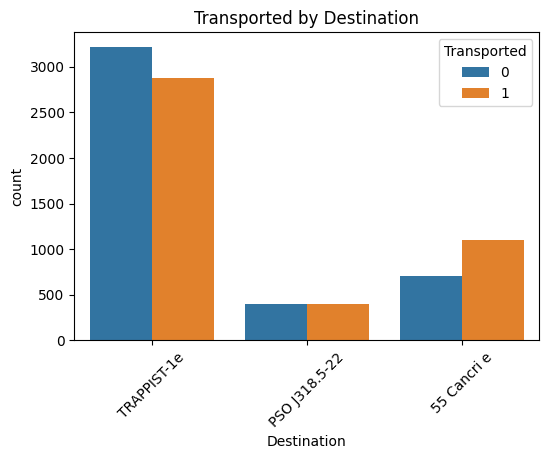

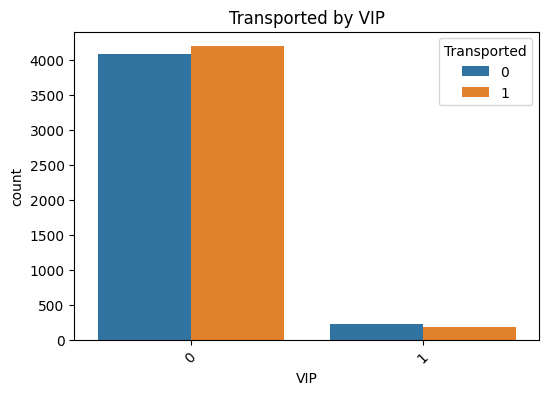

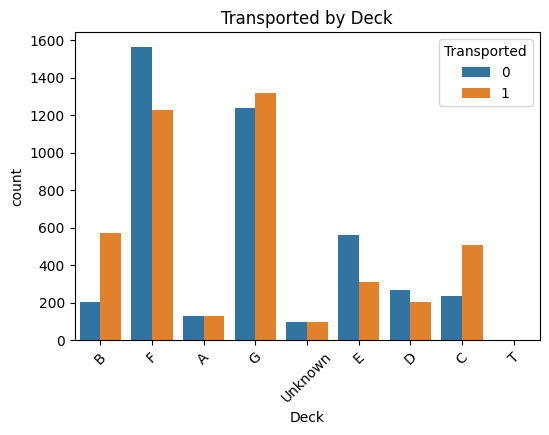

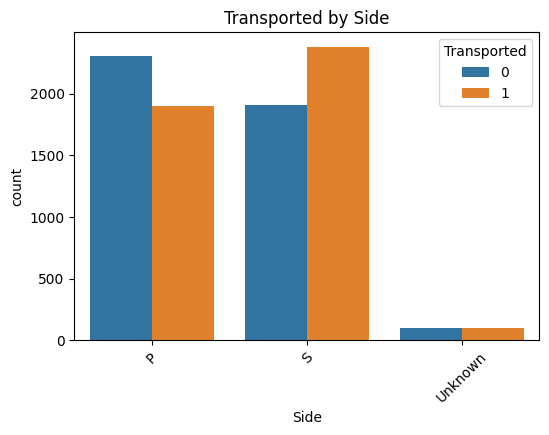

In [15]:
# Categorical features vs 'Transported'
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

for col in categorical_features:
  plt.figure(figsize=(6,4))
  sns.countplot(data=train, x = col, hue='Transported')
  plt.title(f'Transported by {col}')
  plt.xticks(rotation=45)
  plt.show()

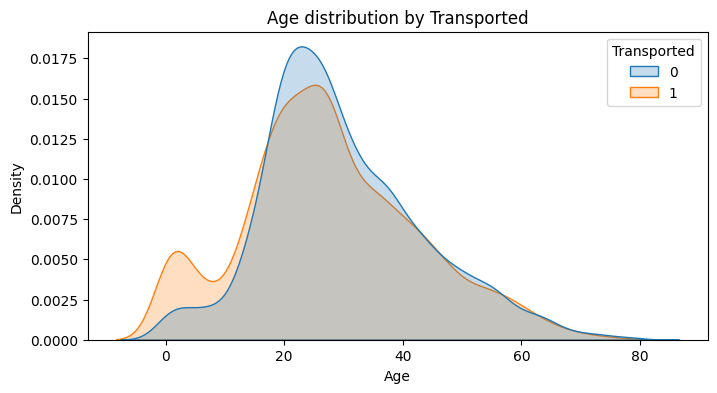

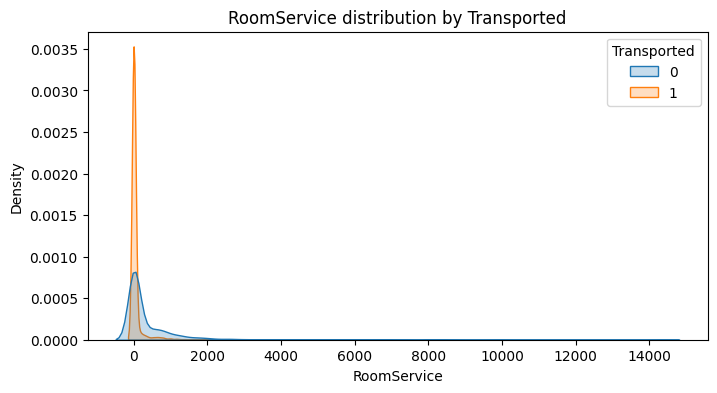

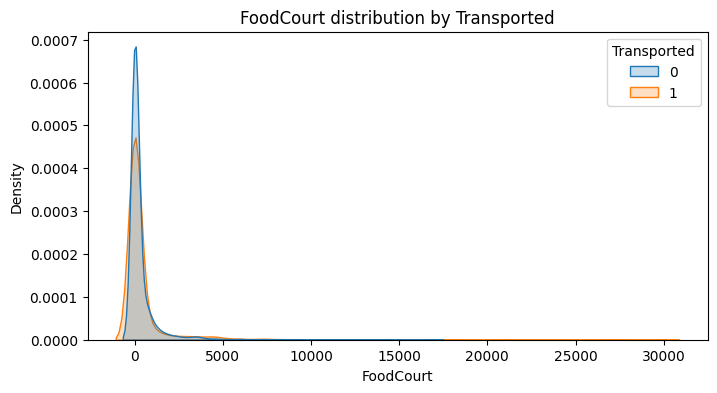

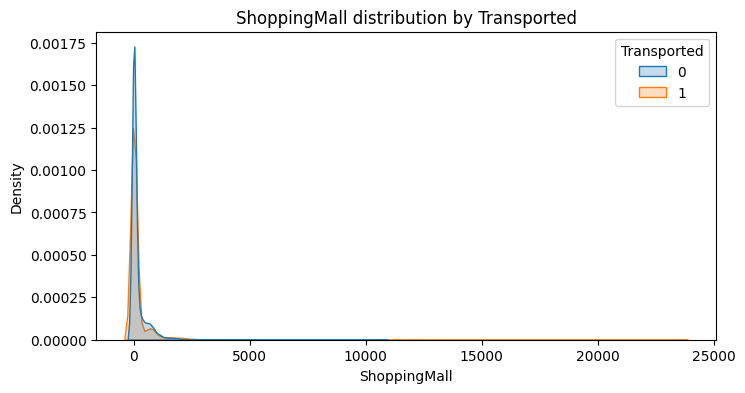

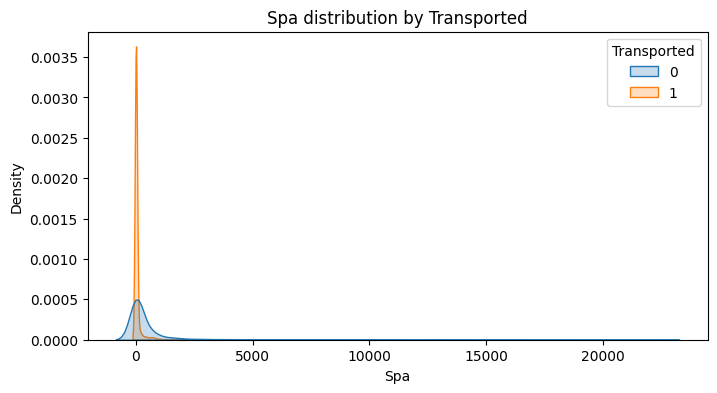

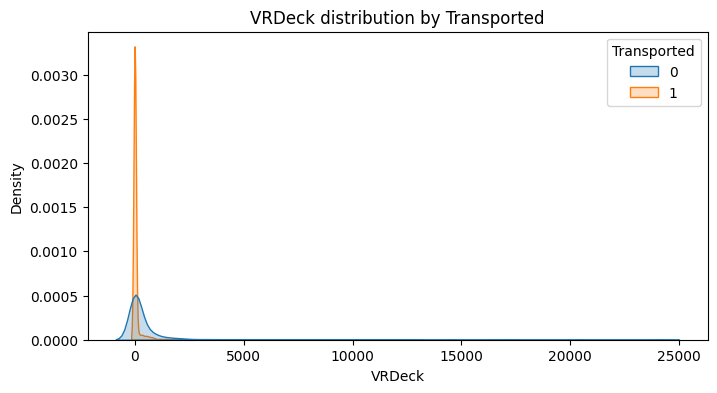

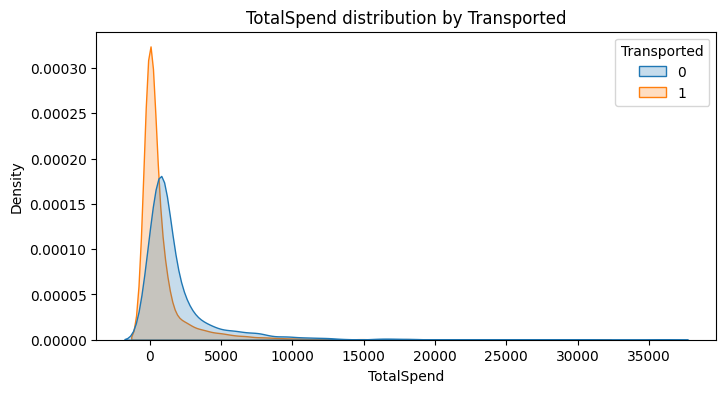

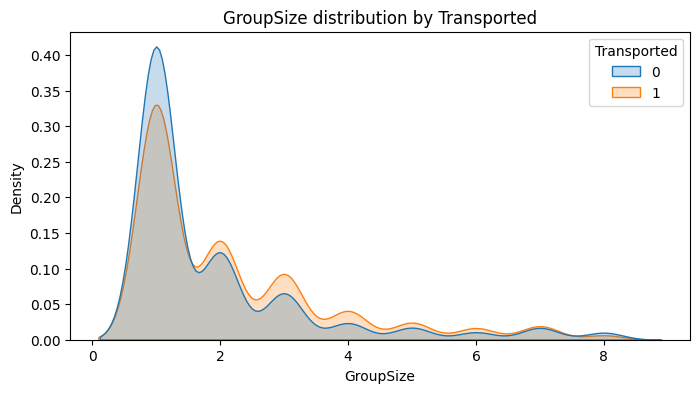

In [16]:
# Numeric features vs Transported
numerical_features = ['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend','GroupSize']

for col in numerical_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=train, x=col, hue='Transported', fill=True)
    plt.title(f'{col} distribution by Transported')
    plt.show()

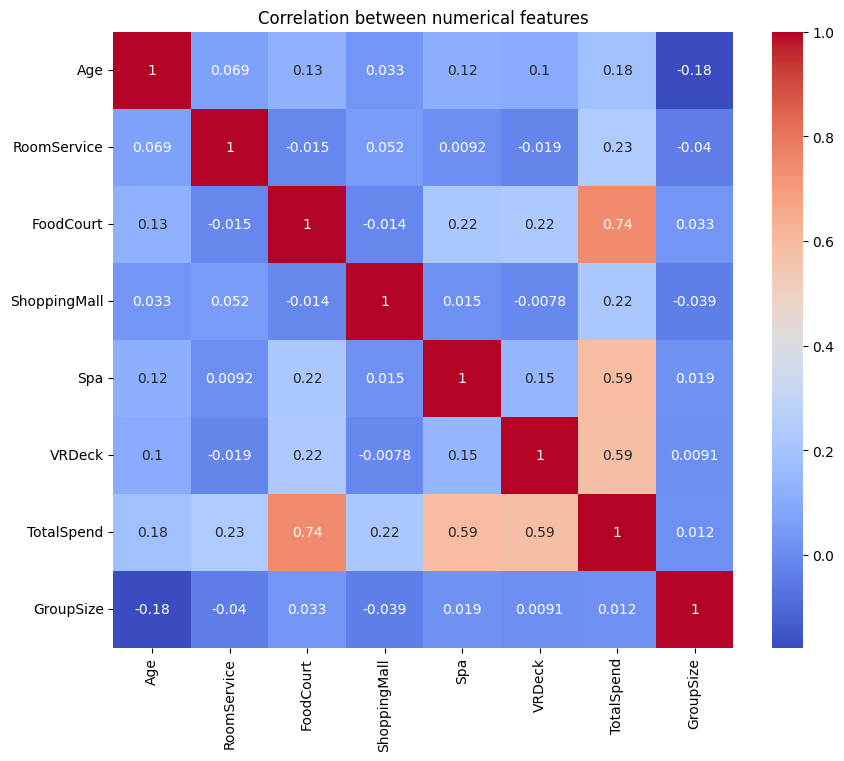

In [17]:
# Correlationa Heatmap (numerical)
plt.figure(figsize=(10,8))
sns.heatmap(train[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','TotalSpend','GroupSize']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between numerical features')
plt.show()

## **Label Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder

# columns to encode
categorical_features = ['HomePlanet', 'Destination', 'Deck', 'Side']

# Initialize label encoder
le = LabelEncoder()

# Apply to train and test
for col in categorical_features:
  train[col] = le.fit_transform(train[col])
  test[col] = le.transform(test[col])

### **Seperate feature and target**

In [20]:
X = train.drop('Transported', axis = 1)
y = train['Transported']

### **Split training and testing data**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### **Train a baseline model - RandomForestClassifier**

In [34]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

### **Evaluting the model performance**

In [35]:
from sklearn.metrics import accuracy_score

val_pred = rf_model.predict(X_val)

# Check accuracy
val_acc = accuracy_score(y_val, val_pred)
print("Validation Accuracy:", val_acc)

Validation Accuracy: 0.8021851638872916


### **Hyperparameter tuning using RandomizedSearchCV**

In [36]:
from sklearn.model_selection import RandomizedSearchCV

params_dict = {
    'n_estimators' : [100, 200, 300, 500],
    'max_depth' : [None, 10, 15, 20, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(
    estimator = rf_model,
    param_distributions= params_dict,
    n_iter= 20,
    cv = 3,
    scoring= 'accuracy',
    random_state= 42,
    n_jobs= -1,
    verbose = 2
)

rf_random.fit(X_train, y_train)

print("Best Parameters:", rf_random.best_params_)
print("Best CV Score:", rf_random.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
Best CV Score: 0.8002588438308886


### **Retrain RandomForestClassifier using hypertuned parameter**

In [37]:
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='log2',
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predict on test set
test_preds = best_rf.predict(test)

# Convert predictions back to True/False (since Kaggle expects that)
submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Transported": test_preds.astype(bool)
})

# Save to CSV
submission.to_csv("submission.csv", index=False)

print("✅ Submission file saved as submission.csv")

✅ Submission file saved as submission.csv
